# Data Mining Assignment - 2
# Prem Mettupalli - 0826227

## Libraries

In [2]:
# importing required libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


## Data Processing

In [3]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv"
data = pd.read_csv(url)
print(type(data))
print(data.head())
# Define all features or columns for clustering
all_features = data[['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]
print(all_features.head())
print(type(all_features))
# scaling all features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(all_features)
data_scaled 
print(data_scaled[:5 ])
print(type(data_scaled))

<class 'pandas.core.frame.DataFrame'>
   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185
   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185
<class 'pandas

# K-means clustering

number of clusters = 2, silhouette score : 0.37415730136485814
number of clusters = 3, silhouette score : 0.3567685389017652
number of clusters = 4, silhouette score : 0.34819485747460033
number of clusters = 5, silhouette score : 0.35696445697910095
number of clusters = 6, silhouette score : 0.3558904934542414
number of clusters = 7, silhouette score : 0.355326775451717
number of clusters = 8, silhouette score : 0.3562905573605705
number of clusters = 9, silhouette score : 0.35886617864784426
number of clusters = 10, silhouette score : 0.3680925241427085
best number of clusters based on silhouette score: 2
K-means Silhouette Score with 2 clusters: 0.37415730136485814
WCSS for 2 clusters: 2600.375648222442


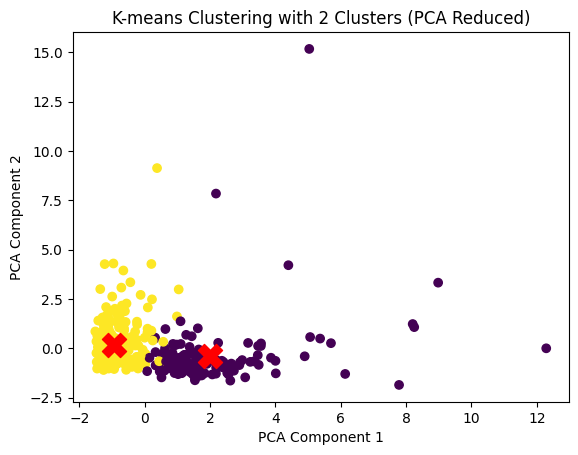

In [5]:
# Using Silhouette score for finding best number of clusters.
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, init='k-means++')
    cluster_labels = kmeans.fit_predict(data_scaled)
    silhouette_avg = silhouette_score(data_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"number of clusters = {n_clusters}, silhouette score : {silhouette_avg}")

# Choose best number of clusters based on the highest silhouette score
best_k = silhouette_scores.index(max(silhouette_scores)) + 2
print(f"best number of clusters based on silhouette score: {best_k}")

# Apply K-Means with the best number of clusters
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)
silhouette_kmeans = silhouette_score(data_scaled, kmeans_labels)
print(f"K-means Silhouette Score with {best_k} clusters: {silhouette_kmeans}")

#WCSS score
wcss_2_clusters = kmeans.inertia_
print(f"WCSS for 2 clusters: {wcss_2_clusters}")

# Apply PCA to reduce the data to two dimensions for better plotting.
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Visualize K-means clusters with PCA components
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=kmeans_labels, cmap='viridis')
plt.scatter(pca.transform(kmeans.cluster_centers_)[:, 0], pca.transform(kmeans.cluster_centers_)[:, 1], 
            s=300, c='red', marker='X')
plt.title(f"K-means Clustering with {best_k} Clusters (PCA Reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


# Agglomerative Hierarchical clustering:

Hierarchical Clustering Silhouette Score with 2 clusters: 0.3680209405194812
WCSS for Agglomerative Clustering with 2 clusters: 2623.6115707028994


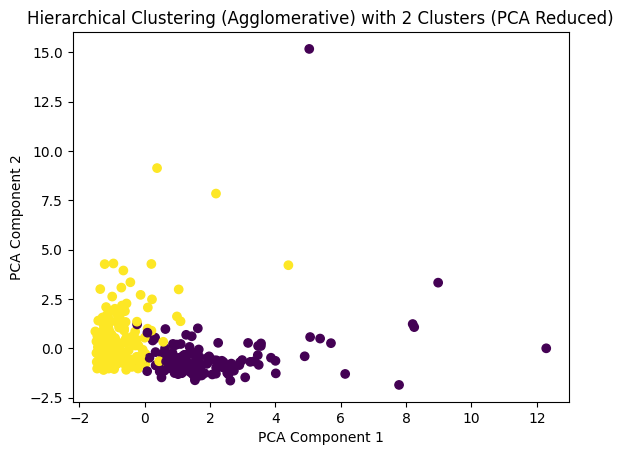

In [17]:
# Apply Hierarchical Clustering (Agglomerative Clustering) with the same number of clusters
agglo = AgglomerativeClustering(n_clusters=best_k, metric='euclidean', linkage='ward')
agglo_labels = agglo.fit_predict(data_scaled)
silhouette_agglo = silhouette_score(data_scaled, agglo_labels)
print("Hierarchical Clustering Silhouette Score with 2 clusters:", silhouette_agglo)

from sklearn.cluster import AgglomerativeClustering
import numpy as np

# Apply Agglomerative Clustering with 2 clusters
agglo = AgglomerativeClustering(n_clusters=2, linkage='ward')
agglo_labels = agglo.fit_predict(data_scaled)

# WCSS for Agglomerative Clustering
wcss_agglo = 0
for cluster_label in np.unique(agglo_labels):
    cluster_points = data_scaled[agglo_labels == cluster_label]
    cluster_centroid = cluster_points.mean(axis=0)
    # Sum of squared distances to the cluster centroid
    wcss_agglo += np.sum((cluster_points - cluster_centroid) ** 2)

print("WCSS for Agglomerative Clustering with 2 clusters:", wcss_agglo)

# Visualize Hierarchical Clustering (Agglomerative) with PCA components
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=agglo_labels, cmap='viridis')
plt.title(f"Hierarchical Clustering (Agglomerative) with {best_k} Clusters (PCA Reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()



# DBSCAN Clustering

DBSCAN Silhouette Score (excluding noise): 0.4123205790292272


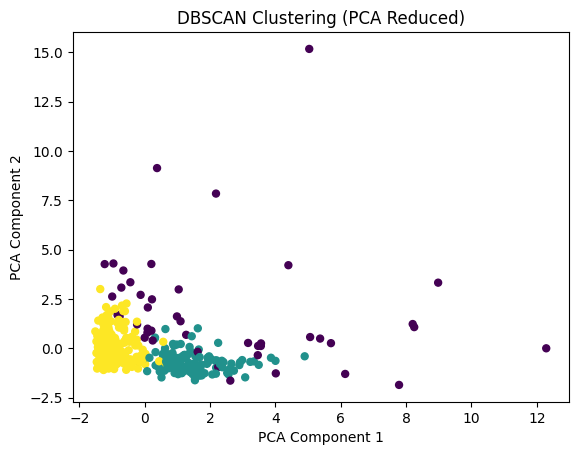

In [10]:
# Set up and fit DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)  # Adjust eps and min_samples based on your data density
dbscan_labels = dbscan.fit_predict(data_scaled)

# Evaluate the clustering performance with the Silhouette Score, ignoring noise (-1)
non_noise_labels = dbscan_labels[dbscan_labels != -1]
non_noise_data = data_scaled[dbscan_labels != -1]

# Calculate Silhouette Score only if there are clusters (more than 1 unique non-noise label)
if len(set(non_noise_labels)) > 1:
    silhouette_dbscan = silhouette_score(non_noise_data, non_noise_labels)
    print(f"DBSCAN Silhouette Score (excluding noise): {silhouette_dbscan}")
else:
    print("Not enough clusters to calculate Silhouette Score.")


# Plot DBSCAN clusters using PCA components for visualization
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=dbscan_labels, cmap='viridis', marker='o', s=25)
plt.title("DBSCAN Clustering (PCA Reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

# Analysing the clusters results and pruchasing patterns:

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
3        1       3  13265  1196     4221    6404               507   
4        2       3  22615  5410     7198    3915              1777   

   Delicassen  Cluster  
0        1338        0  
1        1776        0  
2        7844        0  
3        1788        1  
4        5185        0  

Mean values per feature for each cluster (K-means):
          Channel    Region         Fresh          Milk       Grocery  \
Cluster                                                                 
0        1.978571  2.642857   9575.607143  11447.614286  16774.728571   
1        1.016667  2.496667  13131.820000   3158.970000   3833.666667   

              Frozen  Detergents_Paper   Delicassen  
Cluster                      

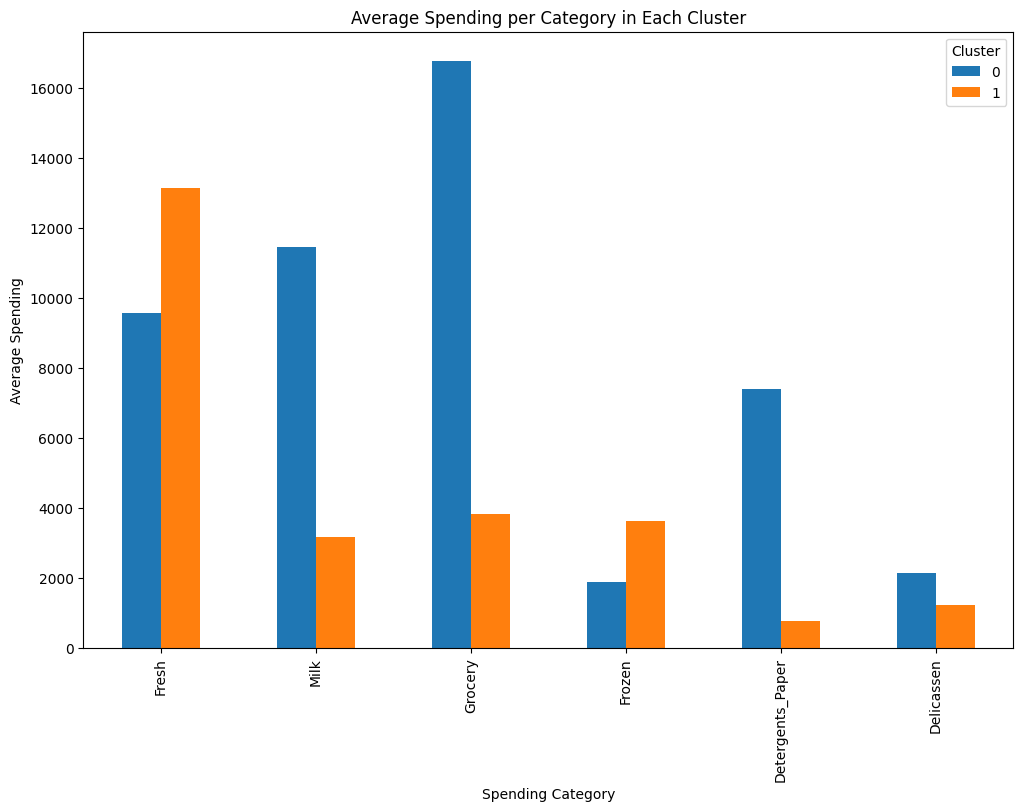

In [7]:
clustered_data = data.assign(Cluster=kmeans_labels)
print(clustered_data.head())
#Calculate the mean values for each feature in each cluster
cluster_means = clustered_data.groupby('Cluster').mean()
print("\nMean values per feature for each cluster (K-means):")
print(cluster_means)

# Bar plot of the average spending in each category per cluster
cluster_means_plot = cluster_means.drop(['Channel', 'Region'], axis=1)  # Drop categorical for easier plotting
cluster_means_plot.T.plot(kind='bar', figsize=(12, 8))
plt.title("Average Spending per Category in Each Cluster")
plt.xlabel("Spending Category")
plt.ylabel("Average Spending")
plt.show()